# CNN 

Neural Network
- ANN (Artificial Neural Network) & Perceptron

<img src="./img/ann.jpeg" width="25%"></img>

In [4]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 88, got 80
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 80 from C header, got 88 from PyObject


In [6]:
tf.__version__

'2.4.1'

sandal


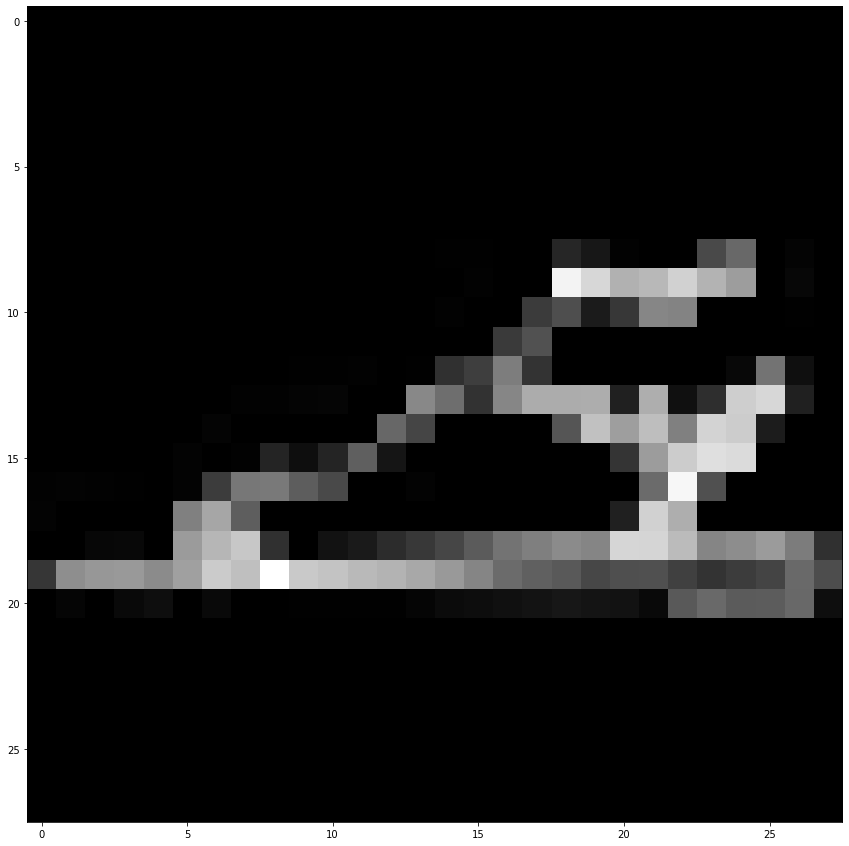

In [33]:
from tensorflow.keras.datasets import fashion_mnist

((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()          ## 기본 데이터 셋을 가져온다!
# print("trainX 의 값: " + str(trainX))

print(label_names[trainY[300]])
plt.imshow(trainX[300], cmap='gray')             #    sandal 이미지라는 뜻

In [10]:
label_names = ["top", "trouser", "pullover", "dress", "coat", 
              "sandal", "shirt", "sneaker", "bag", "ankle boot"]

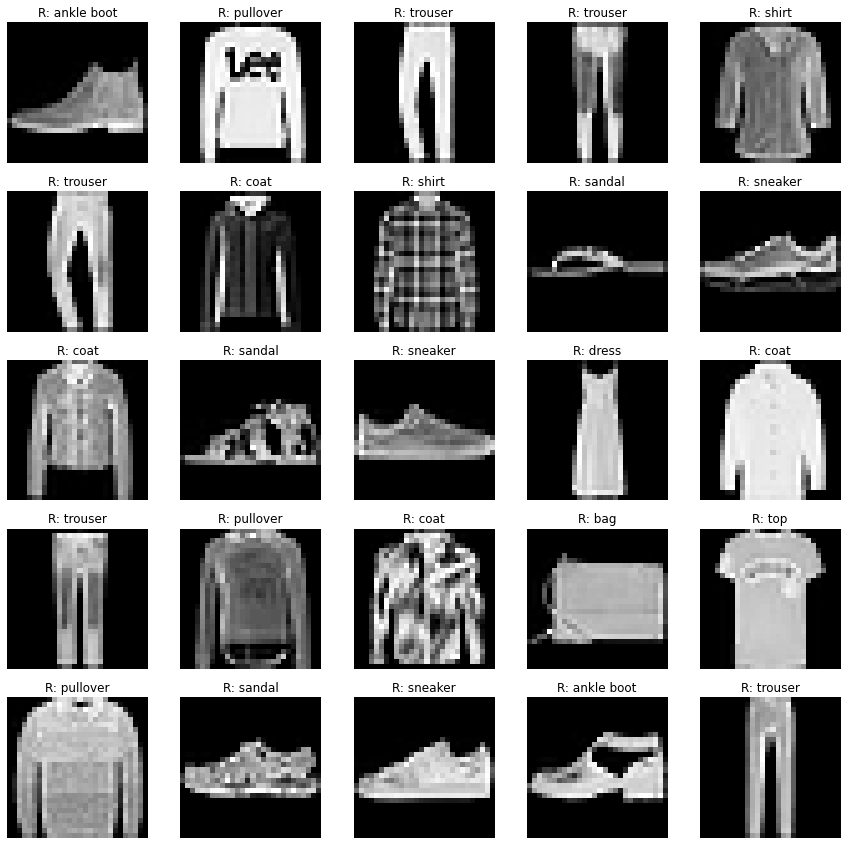

In [29]:
plt_row = 5
plt_col = 5

width = height = 28

plt.rcParams["figure.figsize"] = (15,15)

f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):
    sub_plt = axarr[int(i/plt_row), i%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(testX[i].reshape(width, height), cmap='gray')
    sub_plt_title = 'R: ' + label_names[testY[i]]
    sub_plt.set_title(sub_plt_title)
plt.show()

## 딥러닝읠 위한 데이터 전처리

In [34]:
width = height = 28
num_pixels = width * height 
trainX = trainX.reshape(60000, num_pixels).astype('float32') / 255.0            # (60000, 28, 28) --> (60000, 784)
testX  = testX.reshape(10000, num_pixels).astype('float32') / 255.0             

# 훈련셋과 검증셋 분리
valX = trainX[50000:]               # test셋, train 
valY = trainY[50000:]

trainX = trainX[:50000]
trainY = trainY[:50000]

# one hot encode outputs
num_classes = 10
trainY = tf.keras.utils.to_categorical(trainY, num_classes)
valY = tf.keras.utils.to_categorical(valY, num_classes)
testY = tf.keras.utils.to_categorical(testY, num_classes)

print ('train shape: \t', trainX.shape)
print ('valid shape: \t', valX.shape)
print ('test shape: \t', testX.shape)

train shape: 	 (50000, 784)
valid shape: 	 (10000, 784)
test shape: 	 (10000, 784)


<img src="./img/nn.jpeg" width="50%"/>
<img src="./img/eq.jpeg" width="50%"/>

In [37]:

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

def logistic_regression_model():
    # create model
    model = Sequential()
    
    model.add(Dense(num_classes, input_dim=num_pixels, kernel_initializer='normal', activation='softmax'))
    
    # compile model
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['acc'])              # loss 가 minimize 될 때 까지 학습을 진행한다. 최종 목표가 loss 가 minimum인 것이다.
    
    return model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
782/782 [==============================] - 2s 2ms/step - loss: 0.8343 - acc: 0.7162 - val_loss: 0.5203 - val_acc: 0.8223
Epoch 2/20
782/782 [==============================] - 1s 1ms/step - loss: 0.4904 - acc: 0.8345 - val_loss: 0.4805 - val_acc: 0.8312
Epoch 3/20
782/782 [==============================] - 1s 1ms/step - loss: 0.4652 - acc: 0.8423 - val_loss: 0.4579 - val_acc: 0.8404
Epoch 4/20
782/782 [==============================] - 1s 1ms/step - loss: 0.4507 - acc: 0.8498 - val_loss: 0.4454 - val_acc: 0.8484
Epoch 5/20
782/782 [==============================] - 1s 1ms/step - loss: 0.4307 - acc: 0.8541 - val_loss: 0.4562 - val_

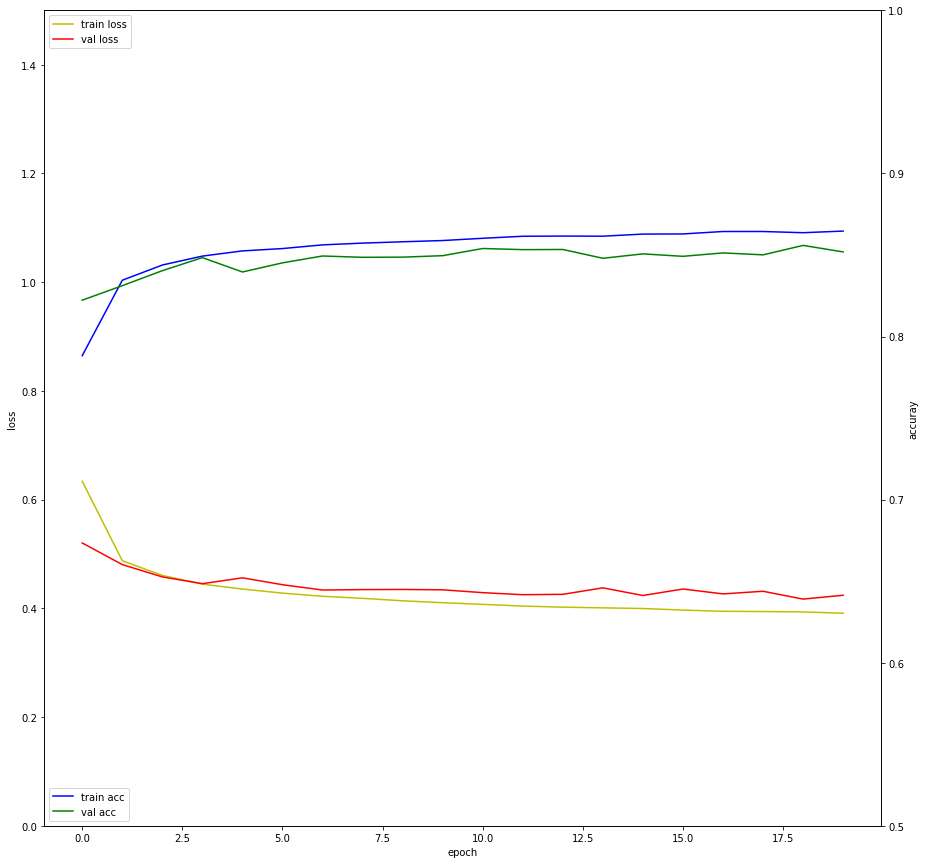

In [38]:
model = logistic_regression_model()
model.summary()
# fix random seed for reproductibility
seed = 7
np.random.seed(seed)
tf.random.set_seed(seed)

# FIT THE MODEL - OPTIMIZATION
hist = model.fit(trainX, trainY, validation_data=(valX, valY), epochs=20, batch_size=64, verbose=1)
model.save('logistic_regression_model.h5')

# 학습과정 살펴보기
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 1.5])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0.5, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()